### Libraries

In [8]:
import tensorflow as tf
import numpy as np
import tensorflow as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### Data Preparation

The images included in the dataset/flowers directory are random subset of the full flowers type data set from the following Kaggle: https://www.kaggle.com/datasets/junkal/flowerdatasets?resource=download

In [3]:
# Renaming Images According to Flower Types
folder_path = 'C:\\Users\\şükrü uzun\\dataset\\flowers'
flower_types = ['daisy', 'dandelion', 'lily', 'orchid', 'rose', 'sunflower', 'tulip']

for flower_type in flower_types:
    full_folder_path = os.path.join(folder_path, flower_type)
    file_list = os.listdir(full_folder_path)
    
    for i, filename in enumerate(file_list):
        new_filename = f"{flower_type}_{i+1}.jpg"
        os.rename(os.path.join(full_folder_path, filename), os.path.join(full_folder_path, new_filename))

In [4]:
#Organize data into train, valid,test directories

os.chdir('C:\\Users\\şükrü uzun\\dataset\\flowers')
if os.path.isdir('train/daisy') is False:
    os.makedirs('train/daisy')
    os.makedirs('train/dandelion')
    os.makedirs('train/lily')
    os.makedirs('train/orchid')
    os.makedirs('train/rose')
    os.makedirs('train/sunflower')
    os.makedirs('train/tulip')
    os.makedirs('valid/daisy')
    os.makedirs('valid/dandelion')
    os.makedirs('valid/lily')
    os.makedirs('valid/orchid')
    os.makedirs('valid/rose')
    os.makedirs('valid/sunflower')
    os.makedirs('valid/tulip')
    os.makedirs('test/daisy')
    os.makedirs('test/dandelion')
    os.makedirs('test/lily')
    os.makedirs('test/orchid')
    os.makedirs('test/rose')
    os.makedirs('test/sunflower')
    os.makedirs('test/tulip')
    
    for c in random.sample(glob.glob('daisy*'),700):
        shutil.move(c,'train/daisy')
    for c in random.sample(glob.glob('dandelion*'),700):
        shutil.move(c,'train/dandelion')
    for c in random.sample(glob.glob('lily*'),700):
        shutil.move(c,'train/lily')
    for c in random.sample(glob.glob('orchid*'),700):
        shutil.move(c,'train/orchid')
    for c in random.sample(glob.glob('rose*'),700):
        shutil.move(c,'train/rose')
    for c in random.sample(glob.glob('sunflower*'),700):
        shutil.move(c,'train/sunflower')
    for c in random.sample(glob.glob('tulip*'),700):
        shutil.move(c,'train/tulip')
    for c in random.sample(glob.glob('daisy*'),200):
        shutil.move(c,'valid/daisy')
    for c in random.sample(glob.glob('dandelion*'),200):
        shutil.move(c,'valid/dandelion')
    for c in random.sample(glob.glob('lily*'),200):
        shutil.move(c,'valid/lily')
    for c in random.sample(glob.glob('orchid*'),200):
        shutil.move(c,'valid/orchid')
    for c in random.sample(glob.glob('rose*'),200):
        shutil.move(c,'valid/rose')
    for c in random.sample(glob.glob('sunflower*'),200):
        shutil.move(c,'valid/sunflower')
    for c in random.sample(glob.glob('tulip*'),200):
        shutil.move(c,'valid/tulip')
    for c in random.sample(glob.glob('daisy*'),200):
        shutil.move(c,'test/daisy')
    for c in random.sample(glob.glob('dandelion*'),50):
        shutil.move(c,'test/dandelion')
    for c in random.sample(glob.glob('lily*'),50):
        shutil.move(c,'test/lily')
    for c in random.sample(glob.glob('orchid*'),50):
        shutil.move(c,'test/orchid')
    for c in random.sample(glob.glob('rose*'),50):
        shutil.move(c,'test/rose')
    for c in random.sample(glob.glob('sunflower*'),50):
        shutil.move(c,'test/sunflower')
    for c in random.sample(glob.glob('tulip*'),50):
        shutil.move(c,'test/tulip')
        
    os.chdir('../../')

In [5]:
train_path= 'dataset/flowers/train'
valid_path = 'dataset/flowers/valid'
test_path ='dataset/flowers/test'

In [21]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['daisy', 'dandelion' ,'lily','orchid','rose','flower','tulip'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['daisy', 'dandelion' ,'lily','orchid','rose','flower','tulip'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['daisy', 'dandelion' ,'lily','orchid','rose','flower','tulip'], batch_size=10, shuffle=False)

Found 4200 images belonging to 7 classes.
Found 1200 images belonging to 7 classes.
Found 450 images belonging to 7 classes.


In [22]:
assert train_batches.n == 4200
assert valid_batches.n == 1200
assert test_batches.n == 450
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 7

In [23]:
imgs, labels = next (train_batches)

In [24]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

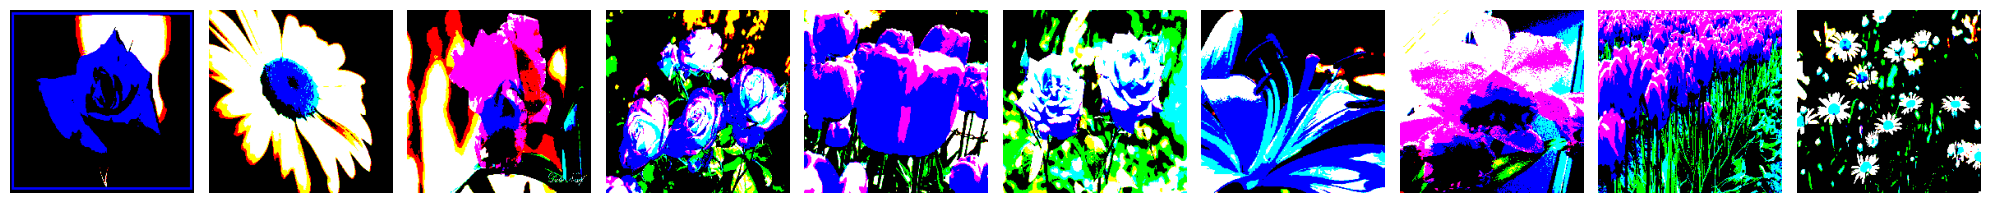

[[0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [25]:
plotImages(imgs)
print(labels)

### Build and Train a CNN

In [26]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=len(flower_types), activation='softmax')
])


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 7)                 1

In [28]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
420/420 - 391s - loss: 10.9426 - accuracy: 0.6126 - val_loss: 1.4666 - val_accuracy: 0.6925 - 391s/epoch - 930ms/step
Epoch 2/10
420/420 - 282s - loss: 0.3917 - accuracy: 0.8900 - val_loss: 1.1614 - val_accuracy: 0.7567 - 282s/epoch - 673ms/step
Epoch 3/10
420/420 - 303s - loss: 0.0518 - accuracy: 0.9838 - val_loss: 1.0793 - val_accuracy: 0.7742 - 303s/epoch - 721ms/step
Epoch 4/10
420/420 - 295s - loss: 0.0083 - accuracy: 0.9993 - val_loss: 1.1143 - val_accuracy: 0.7858 - 295s/epoch - 703ms/step
Epoch 5/10
420/420 - 337s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.1582 - val_accuracy: 0.7825 - 337s/epoch - 802ms/step
Epoch 6/10
420/420 - 381s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.1834 - val_accuracy: 0.7825 - 381s/epoch - 907ms/step
Epoch 7/10
420/420 - 304s - loss: 7.2207e-04 - accuracy: 1.0000 - val_loss: 1.2118 - val_accuracy: 0.7858 - 304s/epoch - 725ms/step
Epoch 8/10
420/420 - 286s - loss: 4.7627e-04 - accuracy: 1.0000 - val_loss: 1.2400 - val_accuracy: 

### Predict


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

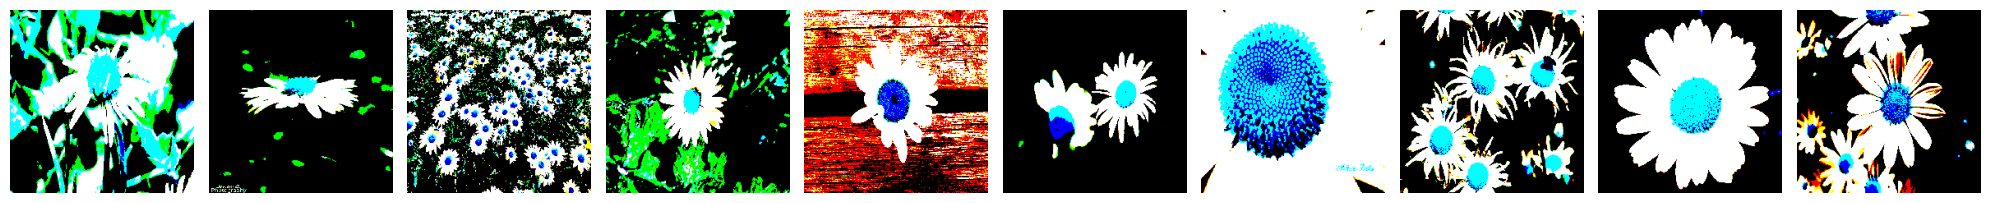

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [30]:
test_imgs, test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [32]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [33]:
predictions = model.predict(x=test_batches, verbose=0)

In [34]:
np.round(predictions)

<tf.Tensor: shape=(450, 7), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)>

In [35]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [48]:
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))  
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [49]:
test_batches.class_indices

{'daisy': 0,
 'dandelion': 1,
 'lily': 2,
 'orchid': 3,
 'rose': 4,
 'flower': 5,
 'tulip': 6}

Confusion matrix, without normalization
[[162  21   1  10   4   2]
 [  4  45   0   0   0   1]
 [  0   1  37   3   6   3]
 [  3   2   2  40   2   1]
 [  0   3   4   3  34   6]
 [  1   2   5   4   5  33]]


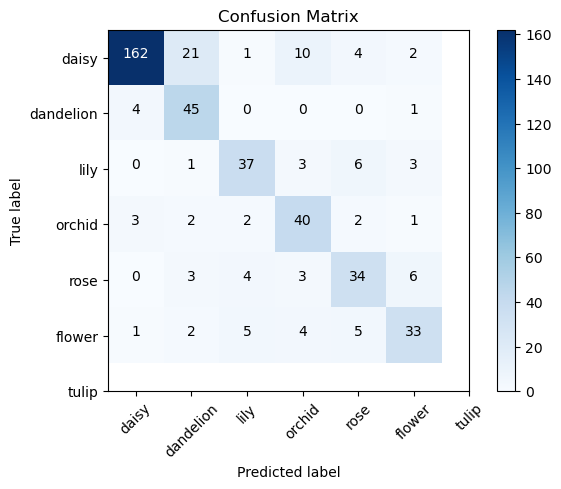

In [50]:
cm_plot_labels = ['daisy','dandelion','lily','orchid','rose','flower','tulip']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Data Augmentation

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [52]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [53]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [61]:
import random
import os

chosen_image = random.choice(os.listdir('dataset/flowers/train/daisy'))

In [62]:
image_path = os.path.join('dataset/flowers/train/daisy', chosen_image)

In [63]:
assert os.path.isfile(image_path)

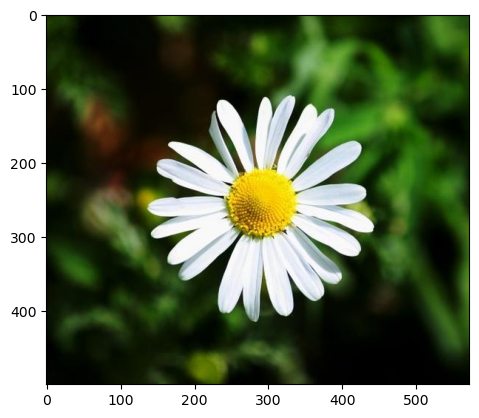

In [64]:
#Obtain image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [65]:
#generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [66]:
#get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

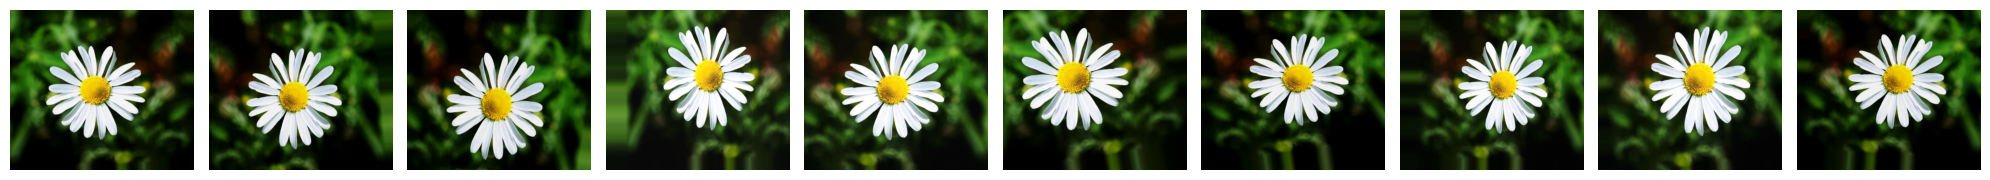

In [67]:
#Augmented images
plotImages(aug_images)